In [3]:
!pip install numpy-financial

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy_financial as npf

In [6]:
# Loan parameters
principal = 200_000  # Principal loan amount
annual_interest_rate = 0.05  # Annual interest rate
monthly_interest_rate = annual_interest_rate / 12  # Monthly interest rate
term_years = 30  # Loan term in years
term_months = term_years * 12  # Loan term in months
monthly_payment = principal * (monthly_interest_rate / (1 - (1 + monthly_interest_rate)**(-term_months)))  # Monthly payments

# Monte Carlo parameters
n_simulations = 1000  # Number of simulations
extra_payment_prob = 0.05  # Probability of making an extra payment
extra_payment_amount = 500  # Extra payment amount

# Simulation
loan_lifetime = np.zeros(n_simulations)


In [7]:
for i in range(n_simulations):
    balance = principal
    n_payments = 0
    while balance > 0:
        n_payments += 1
        interest_payment = balance * monthly_interest_rate
        principal_payment = monthly_payment - interest_payment
        balance -= principal_payment

        # Possible extra payment
        if np.random.rand() < extra_payment_prob:
            extra_payment = min(balance, extra_payment_amount)
            balance -= extra_payment

    loan_lifetime[i] = n_payments / 12  # Convert to years


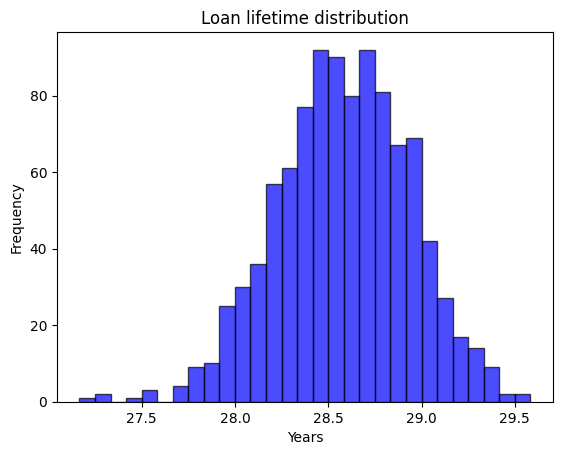

In [8]:
# Plotting
plt.hist(loan_lifetime, bins='auto', alpha=0.7, color='b', edgecolor='black')
plt.title('Loan lifetime distribution')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

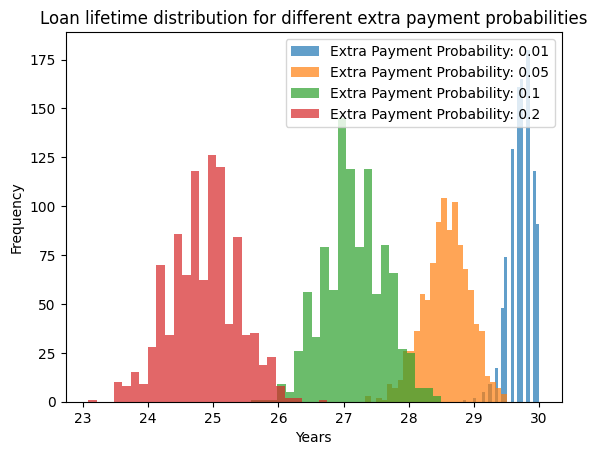


Extra Payment Probability: 0.01
68%: [29.539680792159167, 29.902485874507498]
95%: [29.358278250985002, 30.083888415681663]
99.7%: [29.17687570981084, 30.265290956855825]

Extra Payment Probability: 0.05
68%: [28.18725513022733, 28.887078203105997]
95%: [27.837343593788002, 29.236989739545326]
99.7%: [27.48743205734867, 29.58690127598466]

Extra Payment Probability: 0.1
68%: [26.698044676907816, 27.630621989758847]
95%: [26.231756020482305, 28.09691064618436]
99.7%: [25.76546736405679, 28.563199302609874]

Extra Payment Probability: 0.2
68%: [24.343158874690875, 25.38234112530912]
95%: [23.823567749381752, 25.901932250618245]
99.7%: [23.303976624072632, 26.421523375927364]


In [12]:
# Adding necessary import
from scipy.stats import norm

# Different probabilities for extra payment
extra_payment_probs = [0.01, 0.05, 0.1, 0.2]

# Placeholder for results
loan_lifetime_probs = np.zeros((len(extra_payment_probs), n_simulations))

# Placeholder for empirical rule results
empirical_rules = {}

for i, extra_payment_prob in enumerate(extra_payment_probs):
    for j in range(n_simulations):
        balance = principal
        n_payments = 0
        while balance > 0:
            n_payments += 1
            interest_payment = balance * monthly_interest_rate
            principal_payment = monthly_payment - interest_payment
            balance -= principal_payment

            # Possible extra payment
            if np.random.rand() < extra_payment_prob:
                extra_payment = min(balance, extra_payment_amount)
                balance -= extra_payment

        loan_lifetime_probs[i, j] = n_payments / 12  # Convert to years

    # Calculate empirical rule values for each extra_payment_prob
    mean = np.mean(loan_lifetime_probs[i])
    std = np.std(loan_lifetime_probs[i])

    empirical_rules[extra_payment_prob] = {
        '68%': [mean - std, mean + std],
        '95%': [mean - 2*std, mean + 2*std],
        '99.7%': [mean - 3*std, mean + 3*std],
    }

# Plotting
for i, extra_payment_prob in enumerate(extra_payment_probs):
    plt.hist(loan_lifetime_probs[i], bins='auto', alpha=0.7, label=f'Extra Payment Probability: {extra_payment_prob}')
plt.title('Loan lifetime distribution for different extra payment probabilities')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Print empirical rule values
for prob, rules in empirical_rules.items():
    print(f'\nExtra Payment Probability: {prob}')
    for rule, interval in rules.items():
        print(f'{rule}: {interval}')


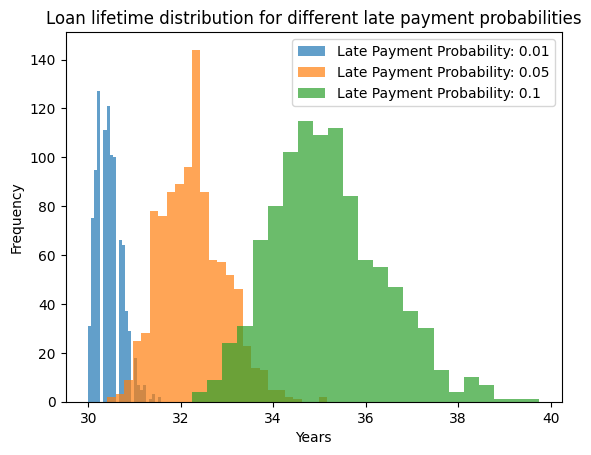


Late Payment Probability: 0.01
68%: [30.174912667609977, 30.72192066572335]
95%: [29.90140866855329, 30.995424664780035]
99.7%: [29.627904669496605, 31.26892866383672]

Late Payment Probability: 0.05
68%: [31.56710221254861, 32.95639778745139]
95%: [30.87245442509722, 33.65104557490278]
99.7%: [30.17780663764583, 34.34569336235417]

Late Payment Probability: 0.1
68%: [33.982884322546944, 36.389115677453056]
95%: [32.77976864509388, 37.59223135490612]
99.7%: [31.576652967640822, 38.795347032359174]


In [13]:
# Different probabilities for late payments
late_payment_probs = [0.01, 0.05, 0.1]

# Placeholder for results
loan_lifetime_probs = np.zeros((len(late_payment_probs), n_simulations))

# Placeholder for empirical rule results
empirical_rules = {}

for i, late_payment_prob in enumerate(late_payment_probs):
    for j in range(n_simulations):
        balance = principal
        n_payments = 0
        while balance > 0:
            n_payments += 1
            interest_payment = balance * monthly_interest_rate
            principal_payment = monthly_payment - interest_payment
            balance -= principal_payment

            # Possible late payment
            if np.random.rand() < late_payment_prob:
                balance += balance * monthly_interest_rate  # Additional month's interest

        loan_lifetime_probs[i, j] = n_payments / 12  # Convert to years

    # Calculate empirical rule values for each late_payment_prob
    mean = np.mean(loan_lifetime_probs[i])
    std = np.std(loan_lifetime_probs[i])

    empirical_rules[late_payment_prob] = {
        '68%': [mean - std, mean + std],
        '95%': [mean - 2*std, mean + 2*std],
        '99.7%': [mean - 3*std, mean + 3*std],
    }

# Plotting
for i, late_payment_prob in enumerate(late_payment_probs):
    plt.hist(loan_lifetime_probs[i], bins='auto', alpha=0.7, label=f'Late Payment Probability: {late_payment_prob}')
plt.title('Loan lifetime distribution for different late payment probabilities')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Print empirical rule values
for prob, rules in empirical_rules.items():
    print(f'\nLate Payment Probability: {prob}')
    for rule, interval in rules.items():
        print(f'{rule}: {interval}')
